In [1]:
import pandas as pd
import numpy as np

In [2]:
# I don’t think we need this cell anymore, also maybe we need records with dates before 2017 or after 2018.
# It depends on the time period we want to examine pre- post the protest (i.e 6 months or a year)  

def select_time_frame(df, date):
    df.date = pd.to_datetime(df.date)
    df = df[df['date'] > pd.to_datetime(date)]
    return df

df_la = select_time_frame(df_la, '2017-01-01')
df_pa = select_time_frame(df_pa, '2017-01-01')
df_sa = select_time_frame(df_sa, '2017-01-01')

df_la.to_csv('data/states/ca_los_angeles_2020_04_01.csv.gz', compression='gzip')
df_pa.to_csv('data/states/pa_philadelphia_2020_04_01.csv.gz', compression='gzip')
df_sa.to_csv('data/states/tx_san_antonio_2020_04_01.csv.gz', compression='gzip')



'''df_la_day = df_la.groupby(['date', 'subject_race', 'subject_sex']).size().reset_index(name='counts')
df_pa_day = df_pa.groupby(['date', 'subject_race', 'subject_sex']).size().reset_index(name='counts')
df_sa_day = df_sa.groupby(['date', 'subject_race', 'subject_sex']).size().reset_index(name='counts')

print(df_pa)

df_census = df_census
df_census_pa = df_census[df_census['state']=='Pennsylvania']

df_census_pa.head(20)
'''

### Data Wrangling

#### 1) Load, parse, filter and sort Count Love data set based on the number of Attendees 

In [2]:
df_protests = pd.read_csv('data/protests.csv')
df_protests.head(2)

,Date,Location,Attendees,Event,Tags,Curated,Source,Total Articles
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4


In [3]:
# Filter racial injustice protests
df_protests = df_protests[df_protests['Event'].str.contains('Racial Injustice')]

# Convert Date column to datetime
df_protests['Date'] = pd.to_datetime(df_protests['Date'])

# Select protests between 2017-01-01 and 2019-01-01
df_protests = df_protests[(df_protests['Date'] >= pd.to_datetime('2017-01-01')) &
                         (df_protests['Date'] < pd.to_datetime('2019-01-01'))]

# Sort protests based on attendess
df_protests = df_protests.sort_values('Attendees',ascending=False)
df_protests.head(20)

,Date,Location,Attendees,Event,Tags,Curated,Source,Total Articles
6875,2018-01-15,"San Antonio, TX",300000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6
4714,2017-08-19,"Boston, MA",40000.0,Racial Injustice (Counter Protest; Alt-Right/N...,Civil Rights; For racial justice; Against whit...,Yes,http://www.waow.com/story/36173262/2017/08/19/...,144
6866,2018-01-15,"Sacramento, CA",20000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.sacbee.com/news/local/article194777...,1
10539,2018-04-04,"Memphis, TN",8000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,https://www.commercialappeal.com/story/news/lo...,40
6873,2018-01-15,"Phoenix, AZ",4000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,https://www.azcentral.com/story/news/local/pho...,1
4907,2017-08-27,"Berkeley, CA",4000.0,Racial Injustice (Counter Protest; Alt-Right/N...,Civil Rights; For racial justice; Against whit...,Yes,http://www.mercurynews.com/2017/08/26/uc-berke...,36
15382,2018-11-14,"Drake University, Des Moines, IA",3500.0,Racial Injustice,Civil Rights; For racial justice,Yes,https://www.desmoinesregister.com/story/news/e...,6
6897,2018-01-15,"Albuquerque, NM",3000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.easternnewmexiconews.com/story/2018...,1
4929,2017-08-28,"Washington, DC",3000.0,Racial Injustice,Civil Rights; For racial justice,Yes,http://www.telegram.com/news/20170828/worceste...,6
4885,2017-08-26,"Knoxville, TN",2800.0,Racial Injustice (Counter Protest; Alt-Right/N...,Civil Rights; For racial justice; Against whit...,Yes,http://www.knoxnews.com/story/news/2017/08/26/...,4


#### 2) Select top 3 largest racial injustice protests in USA

Now that we computed the largest racial injustice protests based on the Count Love dataset, we use the summary tables provided in the website of the original paper (https://openpolicing.stanford.edu/data/) in order to find traffic stop data that matches the time period of the largest protests. Based on this table we found available data for the following protests:

1. index=6875, Date=2018-01-15, Location=San Antonio-TX, Attendees=300000
2. index=4634, Date=2017-08-16, Location=Philadelphia-PA, Attendees=2000
3. index=4353, Date=2017-08-13, Location=Los Angeles-CA, Attendees=1500

#### 3) Merge traffic stops and census data set for the 3 largest protests

##### ------------------->CENSUS FROM PAPER ...-2015

In [4]:
df_census = pd.read_csv('data/census-clean.csv.gz', compression='gzip')
df_census.head()

,state,fips,year,age,race,gender,count
0,Alabama,1001,2010,16-19,Asian,F,11.0
1,Alabama,1001,2010,16-19,Asian,M,18.0
2,Alabama,1001,2010,16-19,Black,F,330.0
3,Alabama,1001,2010,16-19,Black,M,386.0
4,Alabama,1001,2010,16-19,Hispanic,F,39.0


In [5]:
df_census['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [6]:
# Select census data for states of top 3 largest protests
df_census = df_census[(df_census['state'] == 'Texas') | 
                      (df_census['state'] == 'Pennsylvania') | 
                      (df_census['state'] == 'California')]

df_census = df_census[(df_census['year'] >= 2014) & (df_census['year'] <= 2015)]


df_census = df_census.groupby(['state','year','race'])['count'].sum().reset_index()
df_census.head(5)

,state,year,race,count
0,California,2014,Asian,4463701.0
1,California,2014,Black,1790480.0
2,California,2014,Hispanic,10751266.0
3,California,2014,Other,885066.0
4,California,2014,White,12792449.0


##### -------------------> I USED THIS ONE for the following steps: CENSUS FROM official census.gov

see the last one-> " Age, Sex, Race, and Hispanic Origin - 5 race groups (5 race alone or in combination groups) (SC-EST2019-ALLDATA5)" https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-detail.html 

In [7]:
fields = ['NAME', 'ORIGIN', 'RACE', 'AGE', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']
df_census = pd.read_csv('data/census2010-2019.csv', usecols=fields)
df_census.head()

,NAME,ORIGIN,RACE,AGE,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,Alabama,0,1,0,37629,37526,36370,35594
1,Alabama,0,1,1,37732,37904,37641,36679
2,Alabama,0,1,2,38048,37975,38172,37904
3,Alabama,0,1,3,37266,38170,38197,38510
4,Alabama,0,1,4,37954,37322,38312,38476


In [8]:
# Select census data for states of top 3 largest protests
df_census = df_census[(df_census['NAME'] == 'Texas') | 
                      (df_census['NAME'] == 'Pennsylvania') | 
                      (df_census['NAME'] == 'California')]

# Select census data for people older than 16
df_census = df_census[df_census['AGE'] >= 16]

# Exclude people with Hispanic origin and keep only Black and White races
# [1 = Not Hispanic]
df_census = df_census[df_census['ORIGIN'] == 1]

# [1 = White Alone, 2 = Black or African American Alone]
df_census = df_census[(df_census['RACE'] == 1) | (df_census['RACE'] == 2)].drop(columns='ORIGIN')

# Aggregate data based on 'NAME','ORIGIN' and 'RACE'
aggregated_columns = "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018", "POPESTIMATE2019"
df_census = df_census.groupby(['NAME', 'RACE'])[aggregated_columns].sum().reset_index()
 
df_census = df_census.rename(columns={"NAME": "state", "RACE": "race"})

df_census['race'] = df_census['race'].astype(str)

df_census['race'] [df_census['race']  == '1'] = 'white'
df_census['race'] [df_census['race']  == '2'] = 'black'

df_census.head(6)

<ipython-input-8-d7129fecc765>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_census = df_census.groupby(['NAME', 'RACE'])[aggregated_columns].sum().reset_index()
<ipython-input-8-d7129fecc765>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['race'] [df_census['race']  == '1'] = 'white'
<ipython-input-8-d7129fecc765>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['race'] [df_census['race']  == '2'] = 'black'


,state,race,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,California,white,25416948,25265466,25065272,24812928
1,California,black,3604796,3624044,3636574,3646882
2,Pennsylvania,white,16518254,16452188,16387274,16327590
3,Pennsylvania,black,2140470,2152430,2165866,2178842
4,Texas,white,19588284,19658264,19711588,19801104
5,Texas,black,5102892,5224160,5334814,5451640


#### Stanford data from 3 largest protests  

In [9]:
df_sa = pd.read_csv('data/states/tx_san_antonio_2020_04_01.csv.gz', compression='gzip')
df_pa = pd.read_csv('data/states/pa_philadelphia_2020_04_01.csv.gz', compression='gzip')
df_la = pd.read_csv('data/states/ca_los_angeles_2020_04_01.csv.gz', compression='gzip')

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (18,20,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df_sa.columns, df_pa.columns, df_la.columns

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'raw_row_number', 'date', 'time',
        'location', 'lat', 'lng', 'district', 'substation', 'subject_age',
        'subject_race', 'subject_sex', 'type', 'violation', 'arrest_made',
        'citation_issued', 'outcome', 'contraband_found', 'search_conducted',
        'search_basis', 'speed', 'posted_speed', 'vehicle_color',
        'vehicle_make', 'vehicle_model', 'vehicle_registration_state',
        'vehicle_year', 'raw_race', 'raw_posted_speed', 'raw_actual_speed',
        'raw_search_reason', 'raw_contraband_or_evidence',
        'raw_custodial_arrest_made'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'raw_row_number', 'date', 'time',
        'location', 'lat', 'lng', 'district', 'service_area', 'subject_age',
        'subject_race', 'subject_sex', 'type', 'arrest_made', 'outcome',
        'contraband_found', 'frisk_performed', 'search_conducted',
        'search_person', 'search_vehicle', 'raw_race',
        'raw_individua

In [11]:
df_sa.subject_race.unique(), df_pa.subject_race.unique(), df_la.subject_race.unique()
# df_sa.subject_age.describe(), df_pa.subject_age.describe()
# df_sa.shape, df_pa.shape, df_la.shape

(array(['unknown', 'other', 'hispanic', 'white', 'black',
        'asian/pacific islander', nan], dtype=object),
 array(['black', 'white', 'hispanic', 'asian/pacific islander', 'unknown',
        'other'], dtype=object),
 array(['other', 'black', 'hispanic', 'white', 'asian/pacific islander'],
       dtype=object))

In [12]:
# 1.San Antonio-TX
# Aggregate stops on a daily basis and keep only black and white races
#----------------------------->>>>>> I INCLUDED PEDESTRIAN STOPS!!!!!
df_sa = df_sa[(df_sa['subject_race']=='black') | (df_sa['subject_race']=='white')]
df_sa = df_sa.groupby(['date','subject_race']).size().reset_index(name='stops')
df_sa = df_sa.rename(columns={"subject_race": "race"})
df_sa['state'] = 'Texas'

# 2. Philadelphia-PA
# Aggregate stops on a daily basis and keep only black and white races
#----------------------------->>>>>> I INCLUDED PEDESTRIAN STOPS!!!!!
df_pa = df_pa[(df_pa['subject_race']=='black') | (df_pa['subject_race']=='white')]
df_pa = df_pa.groupby(['date','subject_race']).size().reset_index(name='stops')
df_pa = df_pa.rename(columns={"subject_race": "race"})
df_pa['state'] = 'Pennsylvania'

# 3. Los Angeles-CA
# Aggregate stops on a daily basis and keep only black and white races
#----------------------------->>>>>> I INCLUDED PEDESTRIAN STOPS!!!!!
df_la = df_la[(df_la['subject_race']=='black') | (df_la['subject_race']=='white')]
df_la = df_la.groupby(['date','subject_race']).size().reset_index(name='stops')
df_la = df_la.rename(columns={"subject_race": "race"})

df_la['state'] = 'California'

In [13]:
traffic_stops_df = df_sa.append(df_pa, ignore_index=True).append(df_la, ignore_index=True)
traffic_stops_df.head()

,date,race,stops,state
0,2017-01-02,black,36,Texas
1,2017-01-02,white,119,Texas
2,2017-01-03,black,46,Texas
3,2017-01-03,white,143,Texas
4,2017-01-04,black,24,Texas


In [24]:
# Merge stops with census
traffic_stops_census = pd.merge(traffic_stops_df, df_census)
traffic_stops_census.date = pd.to_datetime(traffic_stops_census.date)

traffic_stops_census.head(10)

,date,race,stops,state,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,2017-01-02,black,36,Texas,5102892,5224160,5334814,5451640
1,2017-01-03,black,46,Texas,5102892,5224160,5334814,5451640
2,2017-01-04,black,24,Texas,5102892,5224160,5334814,5451640
3,2017-01-05,black,45,Texas,5102892,5224160,5334814,5451640
4,2017-01-06,black,35,Texas,5102892,5224160,5334814,5451640
5,2017-01-07,black,18,Texas,5102892,5224160,5334814,5451640
6,2017-01-08,black,24,Texas,5102892,5224160,5334814,5451640
7,2017-01-09,black,50,Texas,5102892,5224160,5334814,5451640
8,2017-01-10,black,54,Texas,5102892,5224160,5334814,5451640
9,2017-01-11,black,59,Texas,5102892,5224160,5334814,5451640


In [34]:
selected_protests = df_protests.loc[[6875,4634, 4353]]
selected_protests['state'] = ['Texas', 'Pennsylvania', 'California']
selected_protests['start_date'] = pd.to_datetime(['2018-01-07', '2017-08-08', '2017-08-05'])
selected_protests['end_date'] = pd.to_datetime(['2018-01-21', '2017-08-22', '2017-08-19'])
selected_protests

,Date,Location,Attendees,Event,Tags,Curated,Source,Total Articles,state,start_date,end_date
6875,2018-01-15,"San Antonio, TX",300000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21
4634,2017-08-16,"Philadelphia, PA",2000.0,Racial Injustice (Charlottesville),Civil Rights; For racial justice; Against whit...,Yes,http://6abc.com/philly-is-charlottesville-marc...,16,Pennsylvania,2017-08-08,2017-08-22
4353,2017-08-13,"Los Angeles, CA",1500.0,Racial Injustice (Charlottesville),Civil Rights; For racial justice; Against whit...,Yes,http://mynewsla.com/life/2017/08/13/southern-c...,9,California,2017-08-05,2017-08-19


In [40]:
traffic_stops_census = traffic_stops_census.assign(key=1)
selected_protests = selected_protests.assign(key=1)
traffic_stops_census_protests = pd.merge(traffic_stops_census, selected_protests, on='key').drop('key',axis=1)
traffic_stops_census_protests = traffic_stops_census_protests.query('(date >= start_date and date <= end_date) and state_x == state_y')
traffic_stops_census_protests.head()

,date,race,stops,state_x,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,Date,Location,Attendees,Event,Tags,Curated,Source,Total Articles,state_y,start_date,end_date
1110,2018-01-07,black,38,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",300000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21
1113,2018-01-08,black,64,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",300000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21
1116,2018-01-09,black,42,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",300000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21
1119,2018-01-10,black,66,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",300000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21
1122,2018-01-11,black,67,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",300000.0,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21


In [119]:
traffic_stops_census_protests['elapsed_time'] = pd.to_numeric((traffic_stops_census_protests['Date'] - traffic_stops_census_protests['date']).dt.days,
                                                              downcast='integer')
traffic_stops_census_protests['search_rate'] = traffic_stops_census_protests['stops'] / traffic_stops_census_protests['POPESTIMATE2017']
traffic_stops_census_protests

,date,race,stops,state_x,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,Date,Location,...,Event,Tags,Curated,Source,Total Articles,state_y,start_date,end_date,elapsed_time,search_rate
1110,2018-01-07,black,38,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",...,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21,8,0.000007
1113,2018-01-08,black,64,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",...,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21,7,0.000012
1116,2018-01-09,black,42,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",...,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21,6,0.000008
1119,2018-01-10,black,66,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",...,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21,5,0.000013
1122,2018-01-11,black,67,Texas,5102892,5224160,5334814,5451640,2018-01-15,"San Antonio, TX",...,Racial Injustice (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.kens5.com/news/mlk-march-wrap-up/50...,6,Texas,2018-01-07,2018-01-21,4,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,2017-08-15,white,406,California,25416948,25265466,25065272,24812928,2017-08-13,"Los Angeles, CA",...,Racial Injustice (Charlottesville),Civil Rights; For racial justice; Against whit...,Yes,http://mynewsla.com/life/2017/08/13/southern-c...,9,California,2017-08-05,2017-08-19,-2,0.000016
7934,2017-08-16,white,394,California,25416948,25265466,25065272,24812928,2017-08-13,"Los Angeles, CA",...,Racial Injustice (Charlottesville),Civil Rights; For racial justice; Against whit...,Yes,http://mynewsla.com/life/2017/08/13/southern-c...,9,California,2017-08-05,2017-08-19,-3,0.000016
7937,2017-08-17,white,395,California,25416948,25265466,25065272,24812928,2017-08-13,"Los Angeles, CA",...,Racial Injustice (Charlottesville),Civil Rights; For racial justice; Against whit...,Yes,http://mynewsla.com/life/2017/08/13/southern-c...,9,California,2017-08-05,2017-08-19,-4,0.000016
7940,2017-08-18,white,534,California,25416948,25265466,25065272,24812928,2017-08-13,"Los Angeles, CA",...,Racial Injustice (Charlottesville),Civil Rights; For racial justice; Against whit...,Yes,http://mynewsla.com/life/2017/08/13/southern-c...,9,California,2017-08-05,2017-08-19,-5,0.000021


### Visualization 

In [134]:
def my_init(loc=-0.5):
    ''' Function to initialize the plot. Creates two subplots on white background,
    sets x and y limits, and draws the vertical line'''
    sns.set_theme(context='notebook', style='white', font='sans-serif')
    fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(20,4.5))
    for ax in axs:
        ax.set_xlim(-8,9)
        ax.axvline(loc, color='black', ls='--', lw=0.9)
    return axs

In [149]:
def my_lineplot(data, ax):
    ''' Function that plots the lineplot in the desired colors and width'''
    sns.lineplot(data=data, x='elapsed_time', y='search_rate', hue='race',
                 palette=['blue', 'red'], lw=0.9, ax=ax).legend_.remove()

In [150]:
def my_ticker(ax, ylabel=False):
    ''' Function to set the desired x and y ticks. Selects desired ticks
    and values to show, renames the axes'''
    if ylabel:
        ax.set_xlabel('')
        ax.set_ylabel('Search rate (%)')
    else:
        ax.set_xlabel('')
        ax.set_ylabel('')

In [151]:
def my_title(txt, ax):
    ''' Function that recreates the title style of the plot. It creates a block
    in color silver and adds text on it'''
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('silver')
    at = AnchoredText(txt, loc=10, prop={'backgroundcolor':'silver',
                      'size':12, 'color':'black'}, frameon=False)
    cax.add_artist(at)    

In [152]:
def my_legend(ax):
    ''' Function that draws legend.'''
    legend_elements = [Patch(facecolor='silver', edgecolor='red', linewidth=0.,
                             linestyle='--', label='White drivers', hatch=r'--'), #color='blue'
                       Patch(facecolor='silver', edgecolor='blue', linewidth=0.,
                             linestyle='--', label='Black drivers', hatch=r'--'), #color='black'
                      ] 
    ax.legend(handles=legend_elements, loc="best", frameon=False,
               bbox_to_anchor=(0.44, 0.44, 0.52, 0.5))

In [153]:
def my_regplot(data, ax, ci, color, truncate=True):
    ''' Function to create the underlaying regression plot.'''
    sns.regplot(data=data, x='elapsed_time', y='search_rate', ci=ci, scatter=False, 
                line_kws = {'linestyle':'--', 'color':color, 'lw':1}, truncate=truncate, 
                ax=ax)

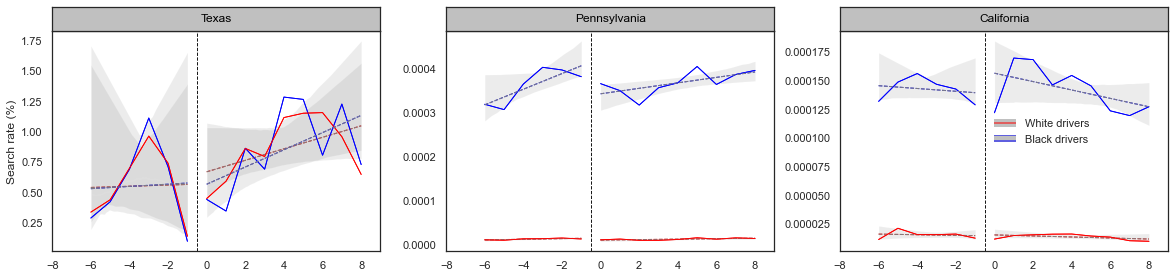

In [154]:
axs = my_init()
colors = {'white':'red', 'black':'blue'}

for i,state in enumerate(data.state_x.unique()):
    for race in ['white', 'black']:
        first_half = data[data.state_x == state]
        first_half = first_half[first_half.elapsed_time >= 0]
        my_lineplot(first_half, axs[i])
        my_regplot(first_half[first_half.race == race], axs[i], 0, colors[race]) # plotting dashed line
        my_regplot(first_half[first_half.race == race], axs[i], 95, 'grey') # plotting grey background

        second_half = data[data.state_x == state]
        second_half = second_half[second_half.elapsed_time < 0]
        my_lineplot(second_half, axs[i])
        my_regplot(second_half[second_half.race == race], axs[i], 0, colors[race]) # plotting dashed line
        my_regplot(second_half[second_half.race == race], axs[i], 95, 'grey') # plotting grey background

    
    my_title(state, axs[i])

my_ticker(axs[0], ylabel=True)
my_ticker(axs[1])
my_ticker(axs[2])

my_legend(axs[2])